# Sentiment Analysis Using Logistic Regression

### Videos:
- Teddy - https://www.loom.com/share/8e4c2473df1d4cfb9c4ef56ae83a6421
- Owen - https://drive.google.com/file/d/1vCWAGnSCP5BsjECNKUOFHA-OiXYzshf2/view?usp=sharing

## Problem Statement
The objective of this project is to analyze the sentiment of movie reviews from the IMDB dataset. We will build a machine learning model to classify reviews as positive or negative based on their content. This project focuses on preprocessing the text data, building a classification model, and evaluating its performance.

The project will involve:
- Preprocessing movie reviews by cleaning the text.
- Using TF-IDF to convert text into numerical features.
- Building a Logistic Regression model to classify the reviews.
- Evaluating the model’s performance using accuracy and other metrics.

## Dataset
The dataset used in this project is the **IMDB movie review dataset**, which contains 25,000 labeled movie reviews (positive/negative). It is provided by the Hugging Face Datasets library.


In [1]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
import warnings
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
import random

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Download NLTK resources if not already present
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oskroeger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/oskroeger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load the IMDB Dataset

We will use the IMDB dataset provided by the Hugging Face Datasets library. This dataset consists of 25,000 labeled movie reviews, where each review is classified as either positive or negative.


In [2]:
# Load the IMDB dataset and store it in a DataFrame
print("Loading the IMDB dataset...")
dataset = load_dataset('imdb')
df = pd.DataFrame(dataset['train'])  # Convert to pandas DataFrame for easier manipulation

Loading the IMDB dataset...


## Data Preprocessing

To prepare the dataset for modeling, we will:
1. Remove punctuation and digits.
2. Convert the text to lowercase.
3. Remove stopwords (words like "the" or "and" that don't contribute to sentiment).
4. Lemmatize the text to reduce words to their base form.

These steps are critical for ensuring that the machine learning model can effectively learn from the text data.


In [3]:
# Define the preprocessing function
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords and lemmatize the remaining words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

# Apply the preprocessing function to the dataset
print("Preprocessing text data...")
df['processed_text'] = [preprocess_text(text) for text in tqdm(df['text'])]

# Display the first few processed reviews
df[['text', 'processed_text']].head()

Preprocessing text data...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:18<00:00, 1360.48it/s]


,text,processed_text
0,I rented I AM CURIOUS-YELLOW from my video sto...,rented curiousyellow video store controversy s...
1,"""I Am Curious: Yellow"" is a risible and preten...",curious yellow risible pretentious steaming pi...
2,If only to avoid making this type of film in t...,avoid making type film future film interesting...
3,This film was probably inspired by Godard's Ma...,film probably inspired godard masculin féminin...
4,"Oh, brother...after hearing about this ridicul...",oh brotherafter hearing ridiculous film umptee...


## Visualizing the Sentiment Distribution

We will visualize the number of positive and negative reviews in the dataset to understand the class distribution.


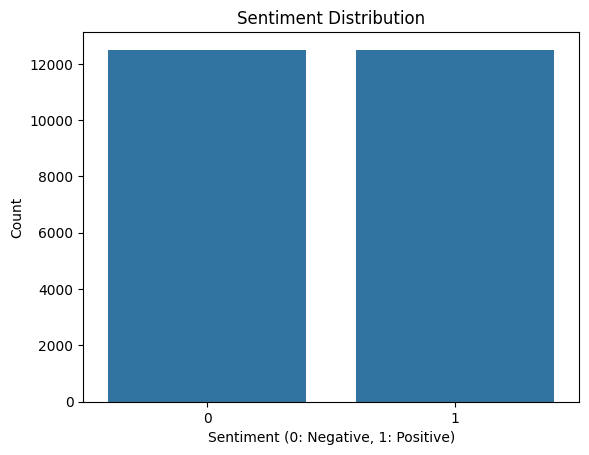

In [4]:
# Visualize the distribution of positive and negative reviews
sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

## Convert Text to Numerical Features using TF-IDF

We will use the `TfidfVectorizer` to convert the processed text data into numerical features. This step transforms each word into a score based on its frequency in the text, which can be used by machine learning models.


In [5]:
# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=6000, ngram_range=(1, 3))  # Unigrams, Bigrams, and Trigrams
X = tfidf.fit_transform(df['processed_text']).toarray()  # Convert text into TF-IDF feature vectors
y = df['label']  # Labels (0 = Negative, 1 = Positive)

## Train-Test Split

We split the dataset into training and testing sets, using 80% of the data for training and 20% for testing. This allows us to evaluate the model on unseen data.


In [6]:
# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Logistic Regression Model

We will build and train a Logistic Regression model to classify the reviews as positive or negative. Logistic Regression is a commonly used binary classification algorithm.


In [7]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=2000, C=0.7)
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)  # Fit the model on the training data

Training the Logistic Regression model...


LogisticRegression(C=0.7, max_iter=2000)

## Evaluate Model Accuracy

Once the model is trained, we will evaluate its performance on the test set by calculating the accuracy score.


In [8]:
# Evaluate the model's accuracy on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.8826


## Predict Sentiment of Real Reviews

We will randomly sample a few real reviews from the dataset and display their predicted sentiment (positive or negative).


In [9]:
# Sample and display real reviews from the dataset along with their predicted sentiment
def display_balanced_reviews_with_predictions(df, model, tfidf, num_samples=6):
    positive_reviews = df[df['label'] == 1]
    negative_reviews = df[df['label'] == 0]
    
    # Randomly sample half positive and half negative reviews
    pos_sample = positive_reviews.sample(num_samples // 2, random_state=42)
    neg_sample = negative_reviews.sample(num_samples // 2, random_state=42)
    
    # Combine positive and negative samples
    sampled_reviews = pd.concat([pos_sample, neg_sample])
    
    # Preprocess the selected reviews
    processed_reviews = [preprocess_text(text) for text in sampled_reviews['text']]
    review_features = tfidf.transform(processed_reviews).toarray()
    
    # Make predictions
    predictions = model.predict(review_features)
    
    # Print the original review and the predicted sentiment
    for idx, (text, pred) in enumerate(zip(sampled_reviews['text'], predictions)):
        sentiment_label = 'Positive' if pred == 1 else 'Negative'
        print(f"Review {idx + 1}:\n{text}\nPredicted Sentiment: {sentiment_label}\n")

# Display 6 real reviews (3 positive, 3 negative) along with their predicted sentiment
display_balanced_reviews_with_predictions(df, model, tfidf, num_samples=6)

Review 1:
This movie is to Halloween what the hilarious "Christmas Story" is to Christmas: both are relatively low-budget, no-big-name-stars type films...and both are two of the absolute greatest and funniest movies available, both seasonal CLASSICS!!! "Spaced Invaders" comes galloping out right from the start with warmth and humor and a superb cast of characters...all five goofy Martians, Klembecker the Realtor, Russell the deputy, Vern at the "fuel dispensing depot" and so many more! You just have to see this movie to believe it, and, like "Christmas Story", it just keeps getting better and better with each viewing, and you pick up on fun little things each time!! MOST DEFINITELY A TEN!!!
Predicted Sentiment: Positive

Review 2:
Good western filmed in the rocky Arizona wilds. Lots of tough guys throughout; Cobern's character seemed to rock back and forth between a raging psycho and a laid back type. Several holes appeared in the picture, but not enough to offset it being exciting and

## Model Evaluation using Confusion Matrix

We will generate a confusion matrix to assess the model's performance and visualize how well it distinguishes between positive and negative reviews.


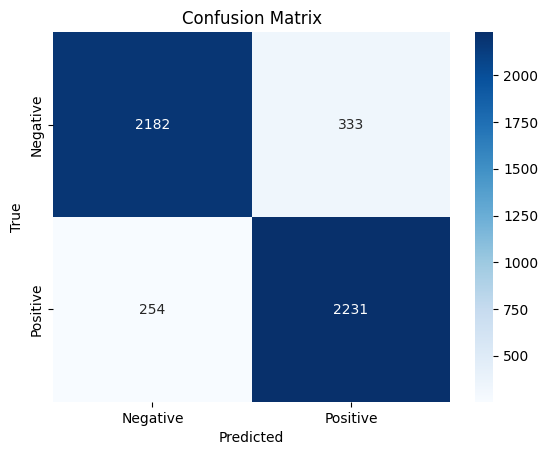

In [10]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Classification Report and Conclusion

We will also display precision, recall, and F1-score to further evaluate the model's performance. These metrics provide deeper insights into how well the model performs.


In [11]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print final accuracy
print(f"Final Accuracy: {accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      2515
           1       0.87      0.90      0.88      2485

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Final Accuracy: 0.8826


## Project Summary and Suitability for Sentiment Analysis

In this project, we developed a sentiment analysis model using the IMDB movie review dataset. The primary goal was to classify movie reviews as either positive or negative, based on their text content. We employed text preprocessing techniques such as removing punctuation, stop words, and lemmatization to clean the text data. Using TF-IDF, we converted the text into numerical feature vectors that could be fed into a machine learning model.

We trained a Logistic Regression model to classify the reviews and evaluated its performance using accuracy, precision, recall, F1-score, and a confusion matrix. The final model achieved an accuracy of approximately 88%, which indicates strong performance given the complexity of the task and the size of the dataset.

### Suitability for Sentiment Analysis

The dataset and methods used in this project are highly suitable for performing sentiment analysis for several reasons:

1. **Balanced Dataset**: The IMDB dataset contains an equal number of positive and negative reviews, making it ideal for binary classification tasks such as sentiment analysis. There is no significant class imbalance, which improves the model's ability to generalize well to both positive and negative sentiments.

2. **Text Preprocessing**: Proper text preprocessing is essential for extracting meaningful information from text data. By cleaning the reviews (removing punctuation, stop words, and lemmatizing), we reduced noise in the dataset, making it easier for the model to learn relevant patterns in the text.

3. **TF-IDF Feature Representation**: TF-IDF is a well-established method for representing text in a numerical form. It captures the importance of words within a document relative to the entire corpus, which helps the model distinguish between reviews with differing sentiments.

4. **Logistic Regression**: Logistic Regression is a reliable and interpretable algorithm for binary classification. Although more complex models like neural networks could potentially improve performance, Logistic Regression provides a strong baseline for sentiment classification while maintaining interpretability.

5. **Model Performance**: The model's accuracy of approximately 88% is a solid result for a sentiment analysis task, given that sentiment can often be subjective and context-dependent. Further improvements could be made by experimenting with different models (e.g., Support Vector Machines or deep learning models) or fine-tuning hyperparameters.

### Limitations and Future Work

While the model performed well, there are some limitations:
- **Subjectivity of Sentiment**: Sentiment can sometimes be subjective. Different users may interpret the same review differently. More advanced models (such as those using word embeddings or transformer-based models like BERT) might capture sentiment nuances more effectively.
- **Neutral Sentiments**: The current approach only handles binary classification (positive vs. negative). In real-world sentiment analysis, there may be neutral sentiments or mixed reviews, which this model does not account for.
- **Complex Language Constructs**: Simple text preprocessing techniques like removing punctuation and lemmatization may not fully capture the complexity of the language used in reviews.

In conclusion, the methods used in this project are well-suited for basic sentiment analysis tasks. The model performs well on a binary classification task, but there is room for improvement through the use of more advanced algorithms and techniques. Future work could focus on addressing these limitations and experimenting with more complex models to further improve performance.